In [69]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt



**PRE-PROCESSING THE TRAIN AND TEST DATA**

In [60]:
df = pd.read_csv('train.csv')
df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass


In [61]:
def convert_assets_to_numeric(asset_str):
    if 'Crore' in asset_str:
        asset_str = asset_str.replace('Crore+', '').strip()
        return int(float(asset_str) * 10000000)  # 1 crore = 10,000,000
    elif 'Lac' in asset_str:
        asset_str = asset_str.replace('Lac+', '').replace('lakh+', '').strip()
        return int(float(asset_str) * 100000)  # 1 lac = 100,000
    elif 'Thou' in asset_str :
        asset_str = asset_str.replace('Thou+', '').replace('thousand+', '').strip()
        return int(float(asset_str) * 1000)  # 1 thousand = 1,000
    elif 'Hund' in asset_str :
        asset_str = asset_str.replace('Hund+', '').replace('Hundred+', '').strip()
        return int(float(asset_str) * 1000)  # 1 thousand = 1,000
    else:
        return 0  # Return None for unknown formats or empty strings


In [71]:
# Assuming df is your DataFrame containing the 'Assets' column
df['Assets_Numerical'] = df['Total Assets'].apply(convert_assets_to_numeric)
df['Liabilities_Numerical'] = df['Liabilities'].apply(convert_assets_to_numeric)

In [73]:
df.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Education,Assets_Numerical,Liabilities_Numerical,Party_encoded,state_encoded,Education_encoded
0,0,M.K. Mohan,ANNA NAGAR,DMK,4,211 Crore+,2 Crore+,TAMIL NADU,8th Pass,2110000000,20000000,7,23,3
1,1,Khatik Ramesh Prasad,KARERA (SC),BJP,0,1 Crore+,0,MADHYA PRADESH,12th Pass,10000000,0,4,13,1
2,2,Dr. Mantar Gowda,MADIKERI,INC,0,7 Crore+,22 Lac+,KARNATAKA,Post Graduate,70000000,2200000,8,11,9
3,3,Kundan Kumar,BEGUSARAI,BJP,0,9 Crore+,24 Lac+,BIHAR,Post Graduate,90000000,2400000,4,3,9
4,4,Swapan Majumder,BANGAON DAKSHIN (SC),BJP,2,2 Crore+,61 Lac+,WEST BENGAL,8th Pass,20000000,6100000,4,27,3


In [74]:
test = pd.read_csv('test.csv')
test.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH


In [102]:
# Columns to be encoded
columns_to_encode = ['Party', 'state']

# Initialize LabelEncoder
label_encoders = {}

# Encode each column
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    test[f'{column}_encoded'] = label_encoders[column].fit_transform(test[column])
    df[f'{column}_encoded'] = label_encoders[column].fit_transform(df[column])


In [155]:
check = pd.read_csv('answers.csv')

In [156]:
columns_to_encode = ['Education']

# Initialize LabelEncoder
label_encoders = {}

# Encode each column
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    df[f'{column}_encoded'] = label_encoders[column].fit_transform(df[column])
    check[f'{column}_encoded'] = label_encoders[column].fit_transform(check[column])


In [103]:
# Assuming df is your DataFrame containing the 'Assets' column
test['Assets_Numerical'] = test['Total Assets'].apply(convert_assets_to_numeric)
test['Liabilities_Numerical'] = test['Liabilities'].apply(convert_assets_to_numeric)

In [79]:
test.shape

(1374, 12)

In [105]:
test.head()

,ID,Candidate,Constituency ∇,Party,Criminal Case,Total Assets,Liabilities,state,Party_encoded,state_encoded,Assets_Numerical,Liabilities_Numerical,Education_encoded
0,0,Geeta Bharat Jain,MEERA BHAYANDAR,IND,2,70 Crore+,11 Crore+,MAHARASHTRA,9,14,700000000,110000000,1
1,1,Becharam Manna,SINGUR,AITC,1,2 Crore+,13 Lac+,WEST BENGAL,2,27,20000000,1300000,9
2,2,Sunil Vijay Tingre,VADGAON SHERI,NCP,3,49 Crore+,1 Crore+,MAHARASHTRA,13,14,490000000,10000000,6
3,3,Asit Mazumder (Tapan),CHUNCHURA,AITC,1,2 Crore+,0,WEST BENGAL,2,27,20000000,0,9
4,4,Hriday Narayan Singh Patel,SAGRI,SP,0,16 Crore+,2 Crore+,UTTAR PRADESH,18,25,160000000,20000000,9


**DATA ANALYSIS**

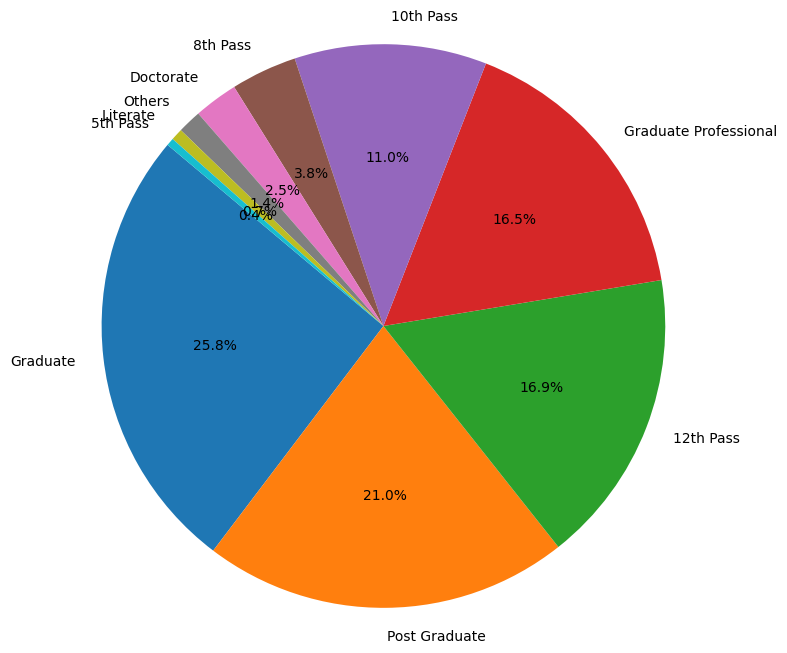

In [168]:
education_distribution = df['Education'].value_counts(normalize=True) * 100

# Plotting the pie chart
plt.figure(figsize=(8, 8))
education_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)

plt.ylabel('')  # Remove the y-label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Save the figure
plt.savefig('education_distribution_pie_chart.png')

# Show the plot
plt.show()

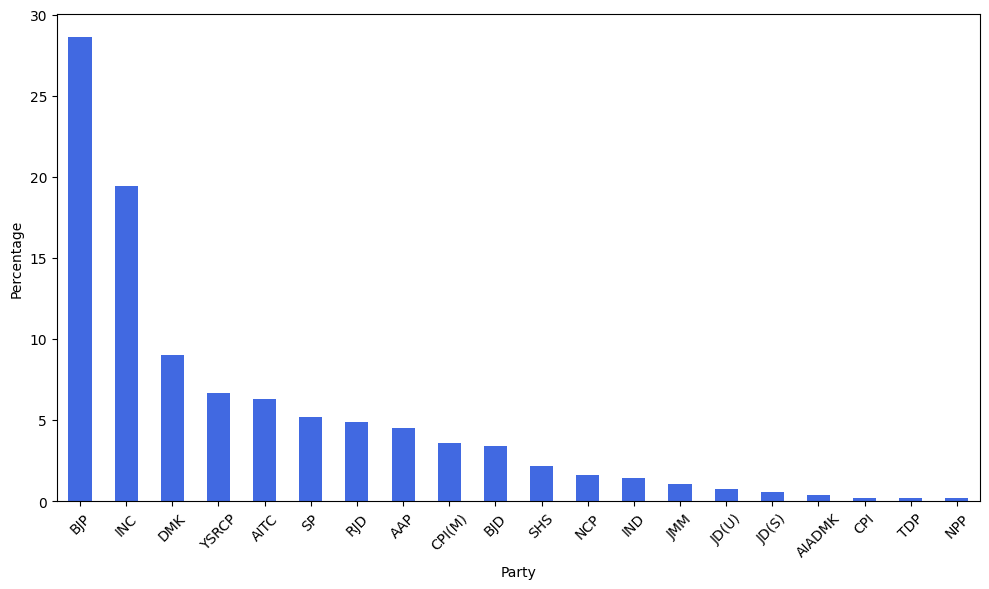

In [169]:
# Assuming 'Criminal Cases' is the column containing the number of criminal cases for each candidate
criminal_cases_mean = df['Criminal Case'].mean()

# Calculate the percentage distribution of parties with candidates having criminal cases more than the mean
party_criminal_cases = df[df['Criminal Case'] > criminal_cases_mean]['Party'].value_counts(normalize=True) * 100

# Plotting the percentage distribution
plt.figure(figsize=(10, 6))
party_criminal_cases.plot(kind='bar', color='royalblue')
# plt.title('Percentage Distribution of Parties with Candidates having Criminal Cases more than Mean')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('party_criminal_cases_distribution_mean.png')
plt.show()


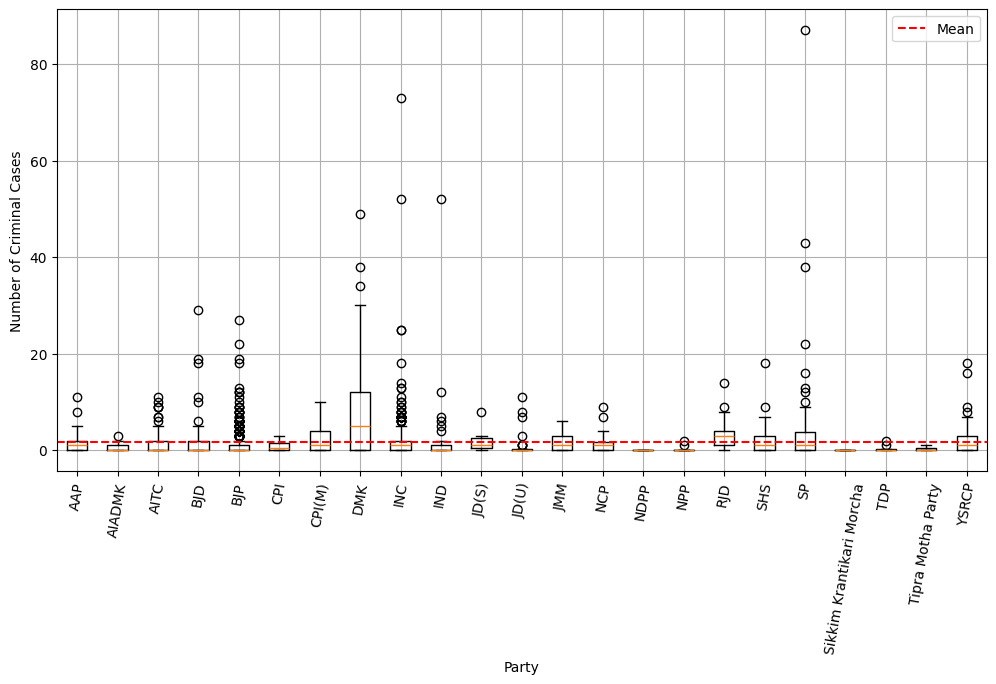

In [170]:
criminal_cases_stats = df.groupby('Party')['Criminal Case'].agg(['min', 'max']).reset_index()

# Plotting the box plot
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Party'] == party]['Criminal Case'] for party in criminal_cases_stats['Party']],
            labels=criminal_cases_stats['Party'])
# plt.title('Distribution of Criminal Cases for Each Party')
plt.xlabel('Party')
plt.ylabel('Number of Criminal Cases')
plt.xticks(rotation=80)
plt.grid(True)

# Add mean line
plt.axhline(y=df['Criminal Case'].mean(), color='r', linestyle='--', label='Mean')

plt.legend()

# Save the figure
plt.savefig('criminal_cases_party_distribution_max_min.png')

# Show the plot
plt.show()

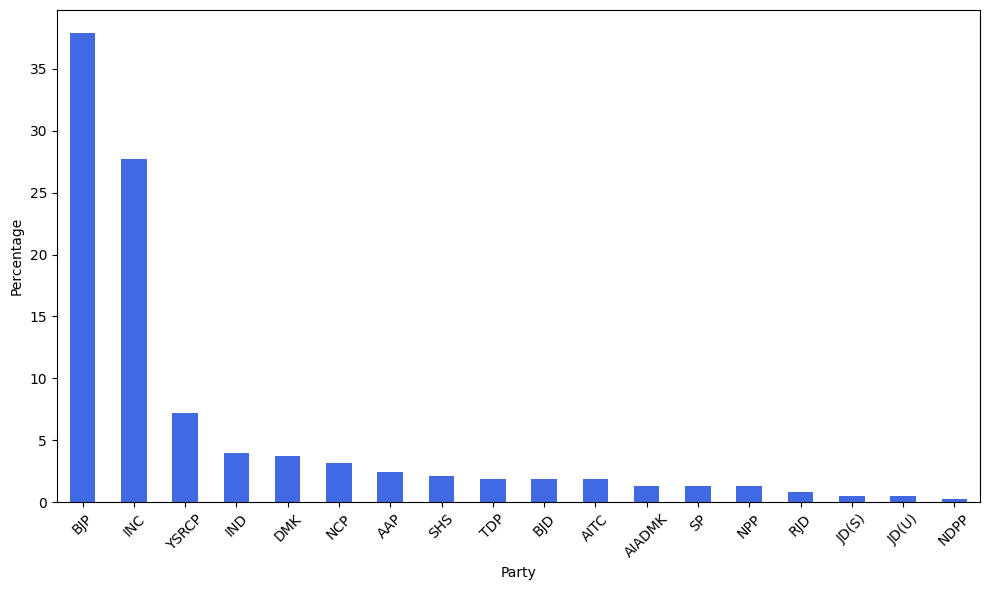

In [171]:
total_assets_mean = df['Assets_Numerical'].mean()

# Calculate the percentage distribution of parties with candidates having total assets greater than the mean
party_total_assets = df[df['Assets_Numerical'] > total_assets_mean]['Party'].value_counts(normalize=True) * 100

# Plotting the percentage distribution
plt.figure(figsize=(10, 6))
party_total_assets.plot(kind='bar', color='royalblue')
# plt.title('Percentage Distribution of Parties with Candidates having Total Assets greater than Mean')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig('party_total_assets_distribution_mean.png')

# Show the plot
plt.show()

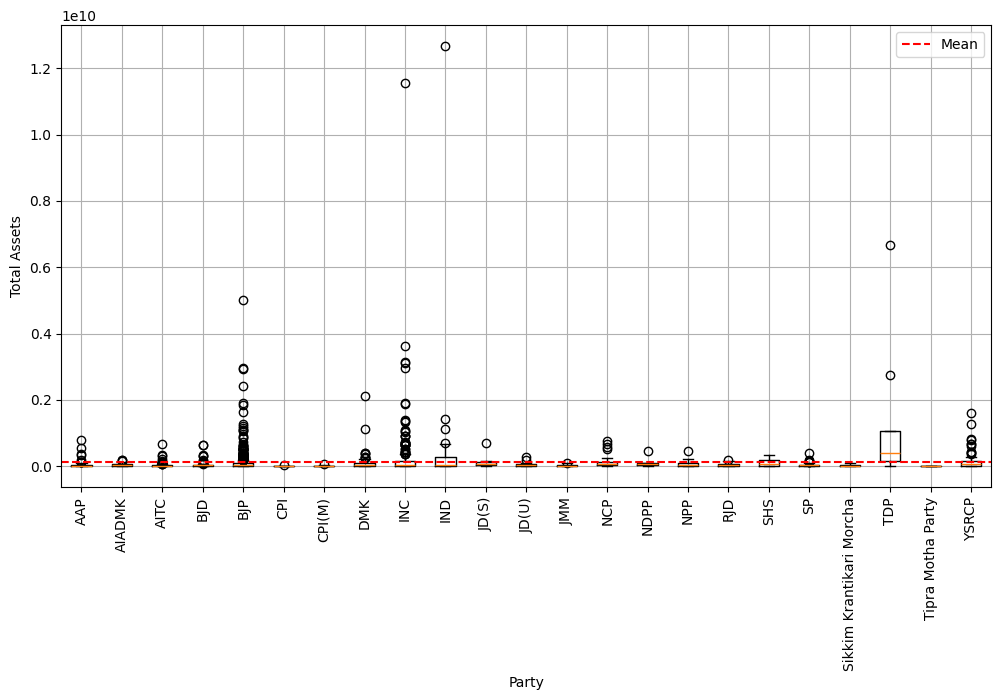

In [172]:
total_assets_stats = df.groupby('Party')['Assets_Numerical'].agg(['min', 'max']).reset_index()

# Plotting the box plot
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Party'] == party]['Assets_Numerical'] for party in total_assets_stats['Party']],
            labels=total_assets_stats['Party'])
# plt.title('Distribution of Total Assets for Each Party')
plt.xlabel('Party')
plt.ylabel('Total Assets')
plt.xticks(rotation=90)
plt.grid(True)

# Add mean line
plt.axhline(y=df['Assets_Numerical'].mean(), color='r', linestyle='--', label='Mean')

plt.legend()

# Save the figure
plt.savefig('total_assets_party_distribution_max_min.png')

# Show the plot
plt.show()

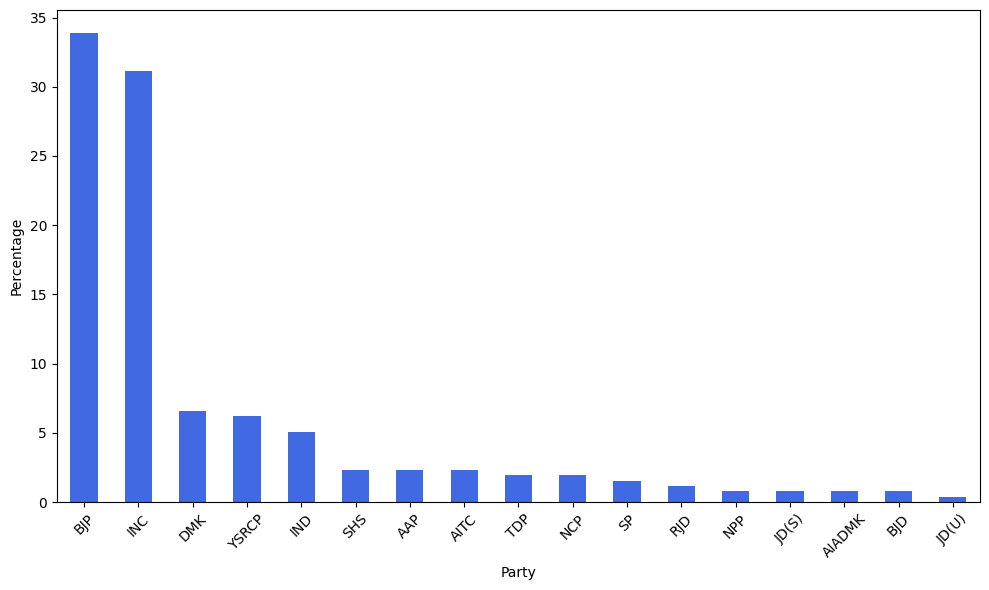

In [173]:
total_assets_mean = df['Liabilities_Numerical'].mean()

# Calculate the percentage distribution of parties with candidates having total assets greater than the mean
party_total_assets = df[df['Liabilities_Numerical'] > total_assets_mean]['Party'].value_counts(normalize=True) * 100

# Plotting the percentage distribution
plt.figure(figsize=(10, 6))
party_total_assets.plot(kind='bar', color='royalblue')
# plt.title('Percentage Distribution of Parties with Candidates having Total Assets greater than Mean')
plt.xlabel('Party')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the figure
plt.savefig('party_liabilites_distribution_mean.png')

# Show the plot
plt.show()

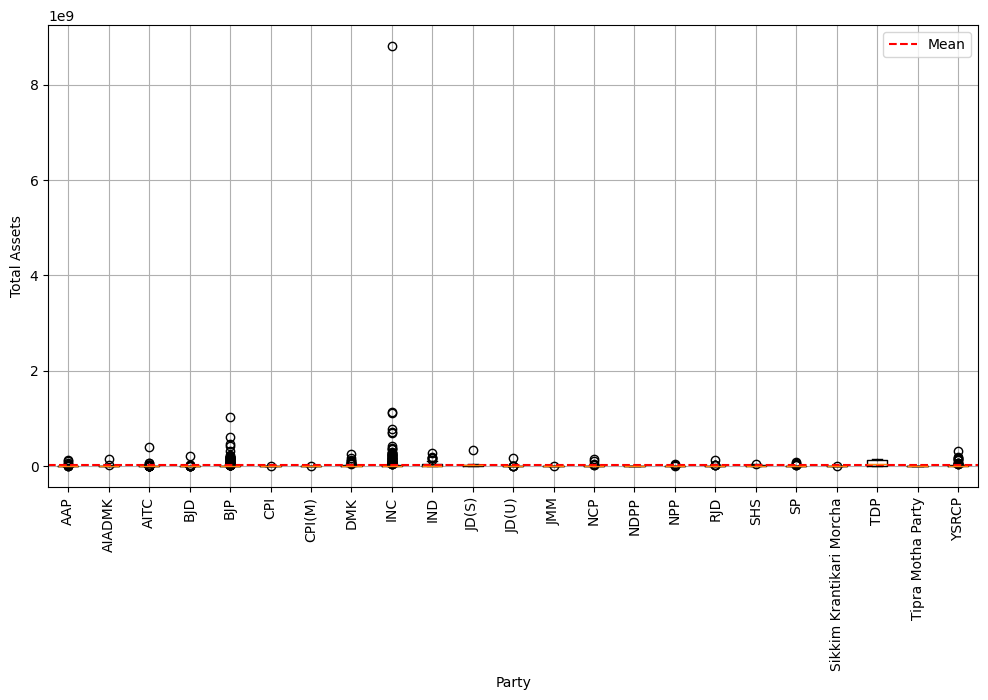

In [174]:
total_assets_stats = df.groupby('Party')['Liabilities_Numerical'].agg(['min', 'max']).reset_index()

# Plotting the box plot
plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Party'] == party]['Liabilities_Numerical'] for party in total_assets_stats['Party']],
            labels=total_assets_stats['Party'])
# plt.title('Distribution of Total Assets for Each Party')
plt.xlabel('Party')
plt.ylabel('Total Assets')
plt.xticks(rotation=90)
plt.grid(True)

# Add mean line
plt.axhline(y=df['Liabilities_Numerical'].mean(), color='r', linestyle='--', label='Mean')

plt.legend()

# Save the figure
plt.savefig('liabilities_party_distribution_max_min.png')

# Show the plot
plt.show()

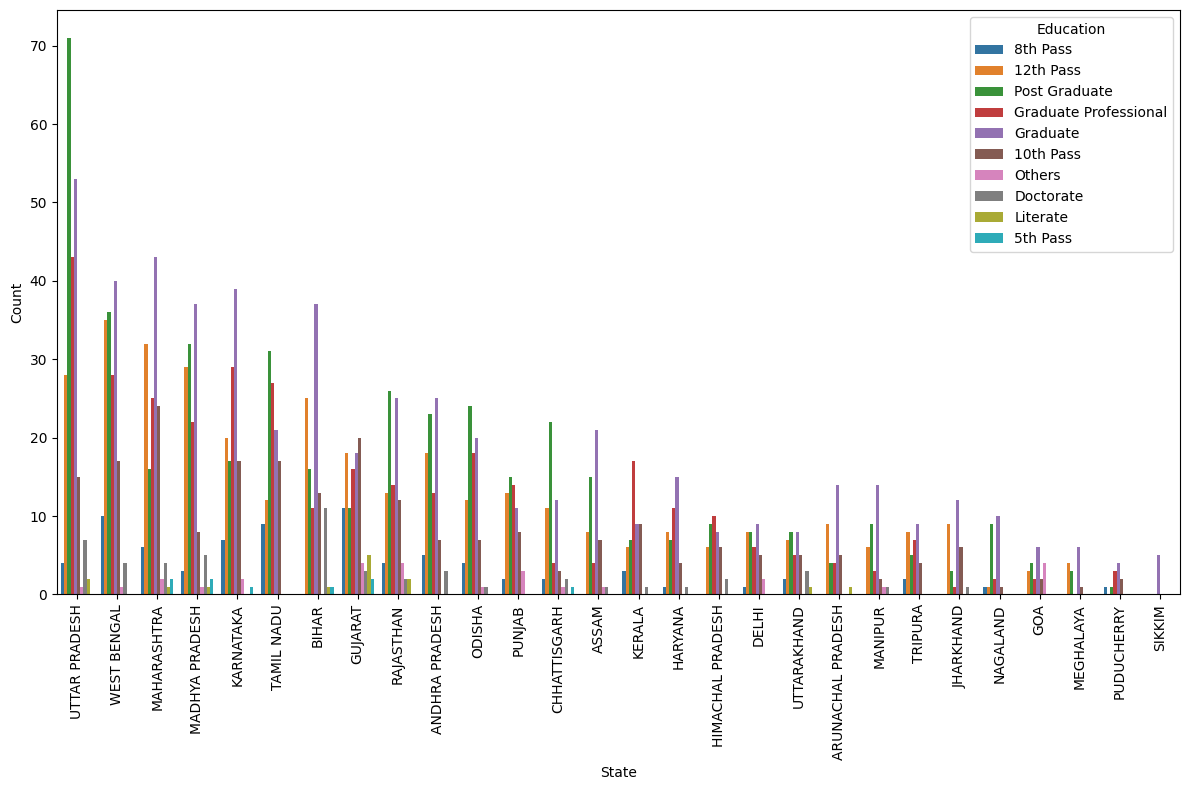

In [175]:
state_education_counts = df.groupby(['state', 'Education']).size().unstack()

# Get the most common education category for each state
most_common_education = state_education_counts.idxmax(axis=1)

# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='state', hue='Education', order=df['state'].value_counts().index)
plt.xlabel('State')
plt.ylabel('Count')
# plt.title('Most Common Education Category for Each State')
plt.xticks(rotation=90)
plt.legend(title='Education')
plt.tight_layout()
plt.savefig('state_wise_education.png')
plt.show()

**TRAINING THE MODEL**

In [114]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

*FINAL MODEL USING DECISION TREE*

In [143]:

X_train = df[['Criminal Case', 'state_encoded', 'Party_encoded']]  # Features for training data
y_train = df['Education_encoded']  # Target variable for training data

X_test = test[['Criminal Case', 'state_encoded', 'Party_encoded']]  # Features for test data

clf = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=1)

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

# Append predicted education_encoded to the test_data DataFrame
test['Education_encoded'] = y_pred


*MODEL USING DT STATEWISE*

In [158]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

X_train = df[['Criminal Case', 'state_encoded', 'Party_encoded']]  # Features for training data
y_train = df['Education_encoded']  # Target variable for training data
X_test = test[['Criminal Case', 'state_encoded', 'Party_encoded']]

# Assuming 'state_encoded' is the column containing the state information
# Replace this with the actual column name if it differs in your DataFrame

# Get unique states from the training data
unique_states_train = df['state_encoded'].unique()

# Initialize a dictionary to store the Decision Tree classifiers for each state
clf_statewise = {}

# Loop through each state and train a Decision Tree classifier
for state in unique_states_train:
    # Select data for the current state
    X_train_state = X_train[X_train['state_encoded'] == state]
    y_train_state = y_train[X_train['state_encoded'] == state]
    
    # Initialize the Decision Tree classifier
    clf_statewise[state] = DecisionTreeClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=1)
    
    # Train the classifier on the state-specific data
    clf_statewise[state].fit(X_train_state, y_train_state)

# Make predictions on the test data
y_pred_test_statewise = pd.Series(dtype=int)  # Initialize empty series to store predictions

# Loop through each state and make predictions using the corresponding classifier
for state in unique_states_train:
    # Select data for the current state from the test set
    X_test_state = X_test[X_test['state_encoded'] == state]
    
    # If there is no data for the current state in the test set, skip making predictions
    if len(X_test_state) == 0:
        continue
    
    # Make predictions using the classifier for the current state
    y_pred_test_statewise_state = pd.Series(clf_statewise[state].predict(X_test_state), index=X_test_state.index)
    
    # Append the predictions to the overall predictions series
    y_pred_test_statewise = pd.concat([y_pred_test_statewise, y_pred_test_statewise_state])

# Append predicted 'Education_encoded' to the test_data DataFrame
test['Education_encoded'] = y_pred_test_statewise

# Now 'test' DataFrame contains predicted 'Education_encoded' for the test data state-wise


*MODEL USING KNN*

USING ONLY features: Criminal Case, State, Party

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

X_train = df[['Criminal Case', 'state_encoded', 'Party_encoded']]  # Features for training data
y_train = df['Education_encoded']  # Target variable for training data

X_test = test[['Criminal Case', 'state_encoded', 'Party_encoded']]  # Features for test data

# Define the range of values for n_neighbors
param_grid = {'n_neighbors': range(1, 21)}  # Range from 1 to 20 inclusive

# Initialize the KNN classifier
knn_clf = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='f1_weighted')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best F1 score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best F1 score:", best_score)

# Use the best classifier obtained from GridSearchCV
best_clf = grid_search.best_estimator_

# Make predictions on the test data
y_pred_test = best_clf.predict(X_test)

# Append predicted education_encoded to the test_data DataFrame
test['Education_encoded'] = y_pred_test


Best parameters: {'n_neighbors': 1}
Best F1 score: 0.20329247791274768


USING ALL THE FEATURES

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

X_train = df[['Criminal Case', 'state_encoded', 'Party_encoded','Liabilities_Numerical','Assets_Numerical']]  # Features for training data
y_train = df['Education_encoded']  # Target variable for training data

X_test = test[['Criminal Case', 'state_encoded', 'Party_encoded','Liabilities_Numerical','Assets_Numerical']]  # Features for test data

# Define the range of values for n_neighbors
param_grid = {'n_neighbors': range(1, 21)}  # Range from 1 to 20 inclusive

# Initialize the KNN classifier
knn_clf = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='f1_weighted')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best F1 score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best F1 score:", best_score)

# Use the best classifier obtained from GridSearchCV
best_clf = grid_search.best_estimator_

# Make predictions on the test data
y_pred_test = best_clf.predict(X_test)

# Append predicted education_encoded to the test_data DataFrame
test['Education_encoded'] = y_pred_test


Best parameters: {'n_neighbors': 11}
Best F1 score: 0.20580122178748333


*MODEL USING LINEARSVC*

In [149]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Example range of values for C

# Initialize the LinearSVC classifier
svm_clf = LinearSVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(svm_clf, param_grid, cv=5, scoring='f1_weighted')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best F1 score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best F1 score:", best_score)

# Use the best classifier obtained from GridSearchCV
best_clf = grid_search.best_estimator_

# Make predictions on the test data
y_pred_test = best_clf.predict(X_test)

# Append predicted 'Education_encoded' to the test DataFrame
test['Education_encoded'] = y_pred_test

test['Education'] = label_encoders['Education'].inverse_transform(test['Education_encoded'])


c:\Users\Akanksha Wattamwar\miniconda3\envs\CS253\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Akanksha Wattamwar\miniconda3\envs\CS253\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Akanksha Wattamwar\miniconda3\envs\CS253\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Akanksha Wattamwar\miniconda3\envs\CS253\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to

Best parameters: {'C': 0.01}
Best F1 score: 0.15731894602270438


c:\Users\Akanksha Wattamwar\miniconda3\envs\CS253\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


*MODEL USING RANDOM FOREST CLASSIFIER*

In [151]:


# Define the range of values for parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest classifier
rf_clf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='f1_weighted')

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best F1 score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best F1 score:", best_score)

# Use the best classifier obtained from GridSearchCV
best_clf = grid_search.best_estimator_

# Make predictions on the test data
y_pred_test = best_clf.predict(X_test)

# Append predicted 'Education_encoded' to the test DataFrame
test['Education_encoded'] = y_pred_test


Best parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 score: 0.2095865896010478


*MODEL USING KNN STATEWISE*

In [152]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Assuming 'state_encoded' is the column containing the state information
# Replace this with the actual column name if it differs in your DataFrame

# Get unique states from the training data
unique_states_train = df['state_encoded'].unique()

# Initialize a dictionary to store the KNN classifiers for each state
knn_classifiers = {}

# Loop through each state and train a KNN classifier
for state in unique_states_train:
    # Select data for the current state
    X_train_state = X_train[X_train['state_encoded'] == state]
    y_train_state = y_train[X_train['state_encoded'] == state]
    
    # Initialize the KNN classifier
    knn_clf = KNeighborsClassifier(n_neighbors=1)  # You can adjust n_neighbors if needed
    
    # Train the classifier on the state-specific data
    knn_clf.fit(X_train_state, y_train_state)
    
    # Store the trained classifier in the dictionary
    knn_classifiers[state] = knn_clf

# Now, you have trained KNN classifiers for each state in the dataset

# Now, to predict on the test data, you can loop through each state and use the corresponding classifier
y_pred_test_statewise = pd.Series(dtype=int)  # Initialize empty series to store predictions

# Loop through each state and make predictions using the corresponding classifier
for state in unique_states_train:
    # Select data for the current state from the test set
    X_test_state = X_test[X_test['state_encoded'] == state]
    
    # If there is no data for the current state i
